# Linear Regression Capstone Project

The ames.csv dataset provides valuable insights into the housing market in Ames by recording various features of houses in Ames including the size of the living area of a house, the year the house was built, and the sale price of the house.<br><br> 

The main objective of this task is to utilise this dataset to predict the sales prices of houses based on the available features.

In [31]:
# Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [32]:
# Read in the ames.csv file and display first few rows
ames_full = pd.read_csv('ames.csv')
ames_full.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


There are too many columns to make sense of the data so we must clean it to pick out the columns most likely to contribute to an accurate sales price prediction<br>
Once we have done that we can build a multiple linear regression and test the hypothesis that those are the most important variables

In [33]:
# Read the following columns into a new DataFrame called ames_full_clean
# Independent Variables:
# Lot Frontage, Lot Area, Overall Qual, Overall Cond, Total Bsmt SF, Gr Liv Area, TotRms AbvGrd, Garage Area, Pool Area
# Dependent Variable:
# SalePrice

columns_to_keep = ['Lot Frontage', 'Lot Area', 'Overall Qual', 'Overall Cond','Total Bsmt SF', 'Gr Liv Area', 'TotRms AbvGrd', 'Garage Area', 'Pool Area', 'SalePrice']
ames_full_clean = ames_full[columns_to_keep]

# Display the first few rows of ames_full_clean
ames_full_clean.head()

,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Total Bsmt SF,Gr Liv Area,TotRms AbvGrd,Garage Area,Pool Area,SalePrice
0,141.0,31770,6,5,1080.0,1656,7,528.0,0,215000
1,80.0,11622,5,6,882.0,896,5,730.0,0,105000
2,81.0,14267,6,6,1329.0,1329,6,312.0,0,172000
3,93.0,11160,7,5,2110.0,2110,8,522.0,0,244000
4,74.0,13830,5,5,928.0,1629,6,482.0,0,189900


The independent variables are all numerical so there is no formatting required other than taking into account whether the variable is integer or floating point.

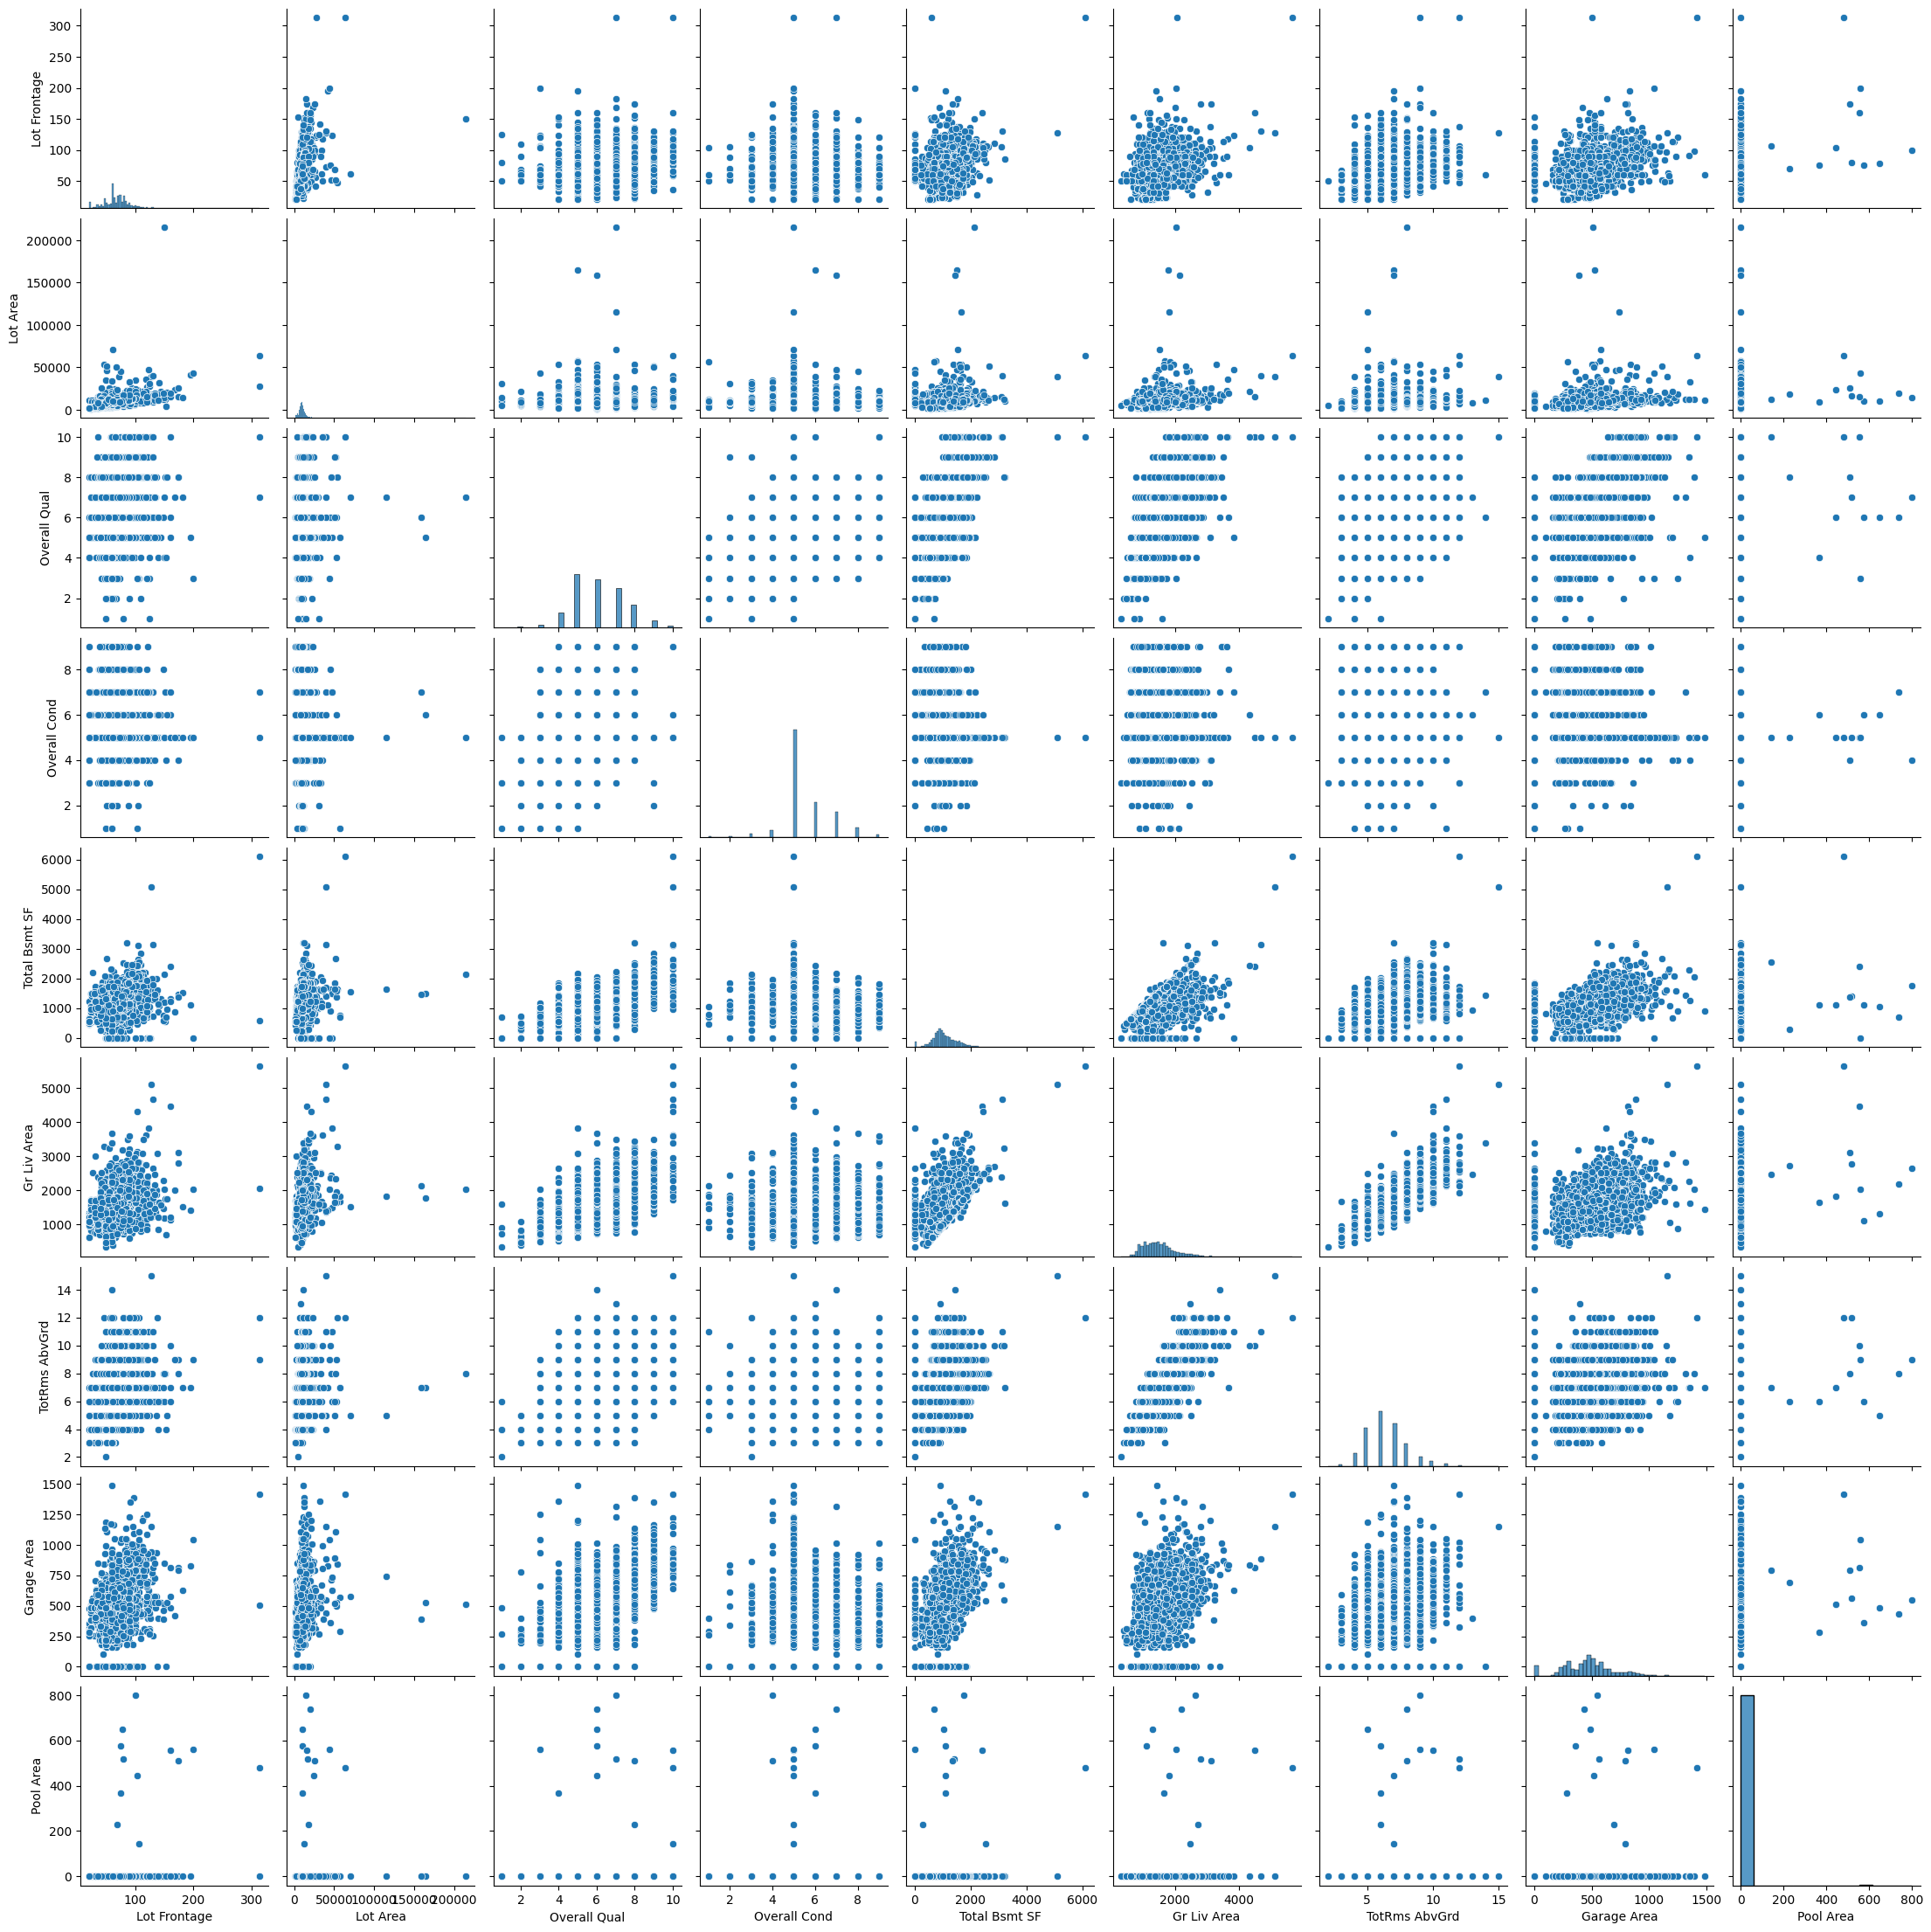

In [34]:
# Plot the distribution of the data
sns.pairplot(data = ames_full_clean.drop('SalePrice', axis=1))

On initial analysis of the data it appears that 'Pool Area' is massively skewing the distribution. On further investigation it appears that 2917 out of the 2930 properties do not have a pool so 'Pool Area' can already be discounted as an important variable when predicting 'SalePrice'<br><br>
We will remove that column and rerun the initial analysis to assess the change

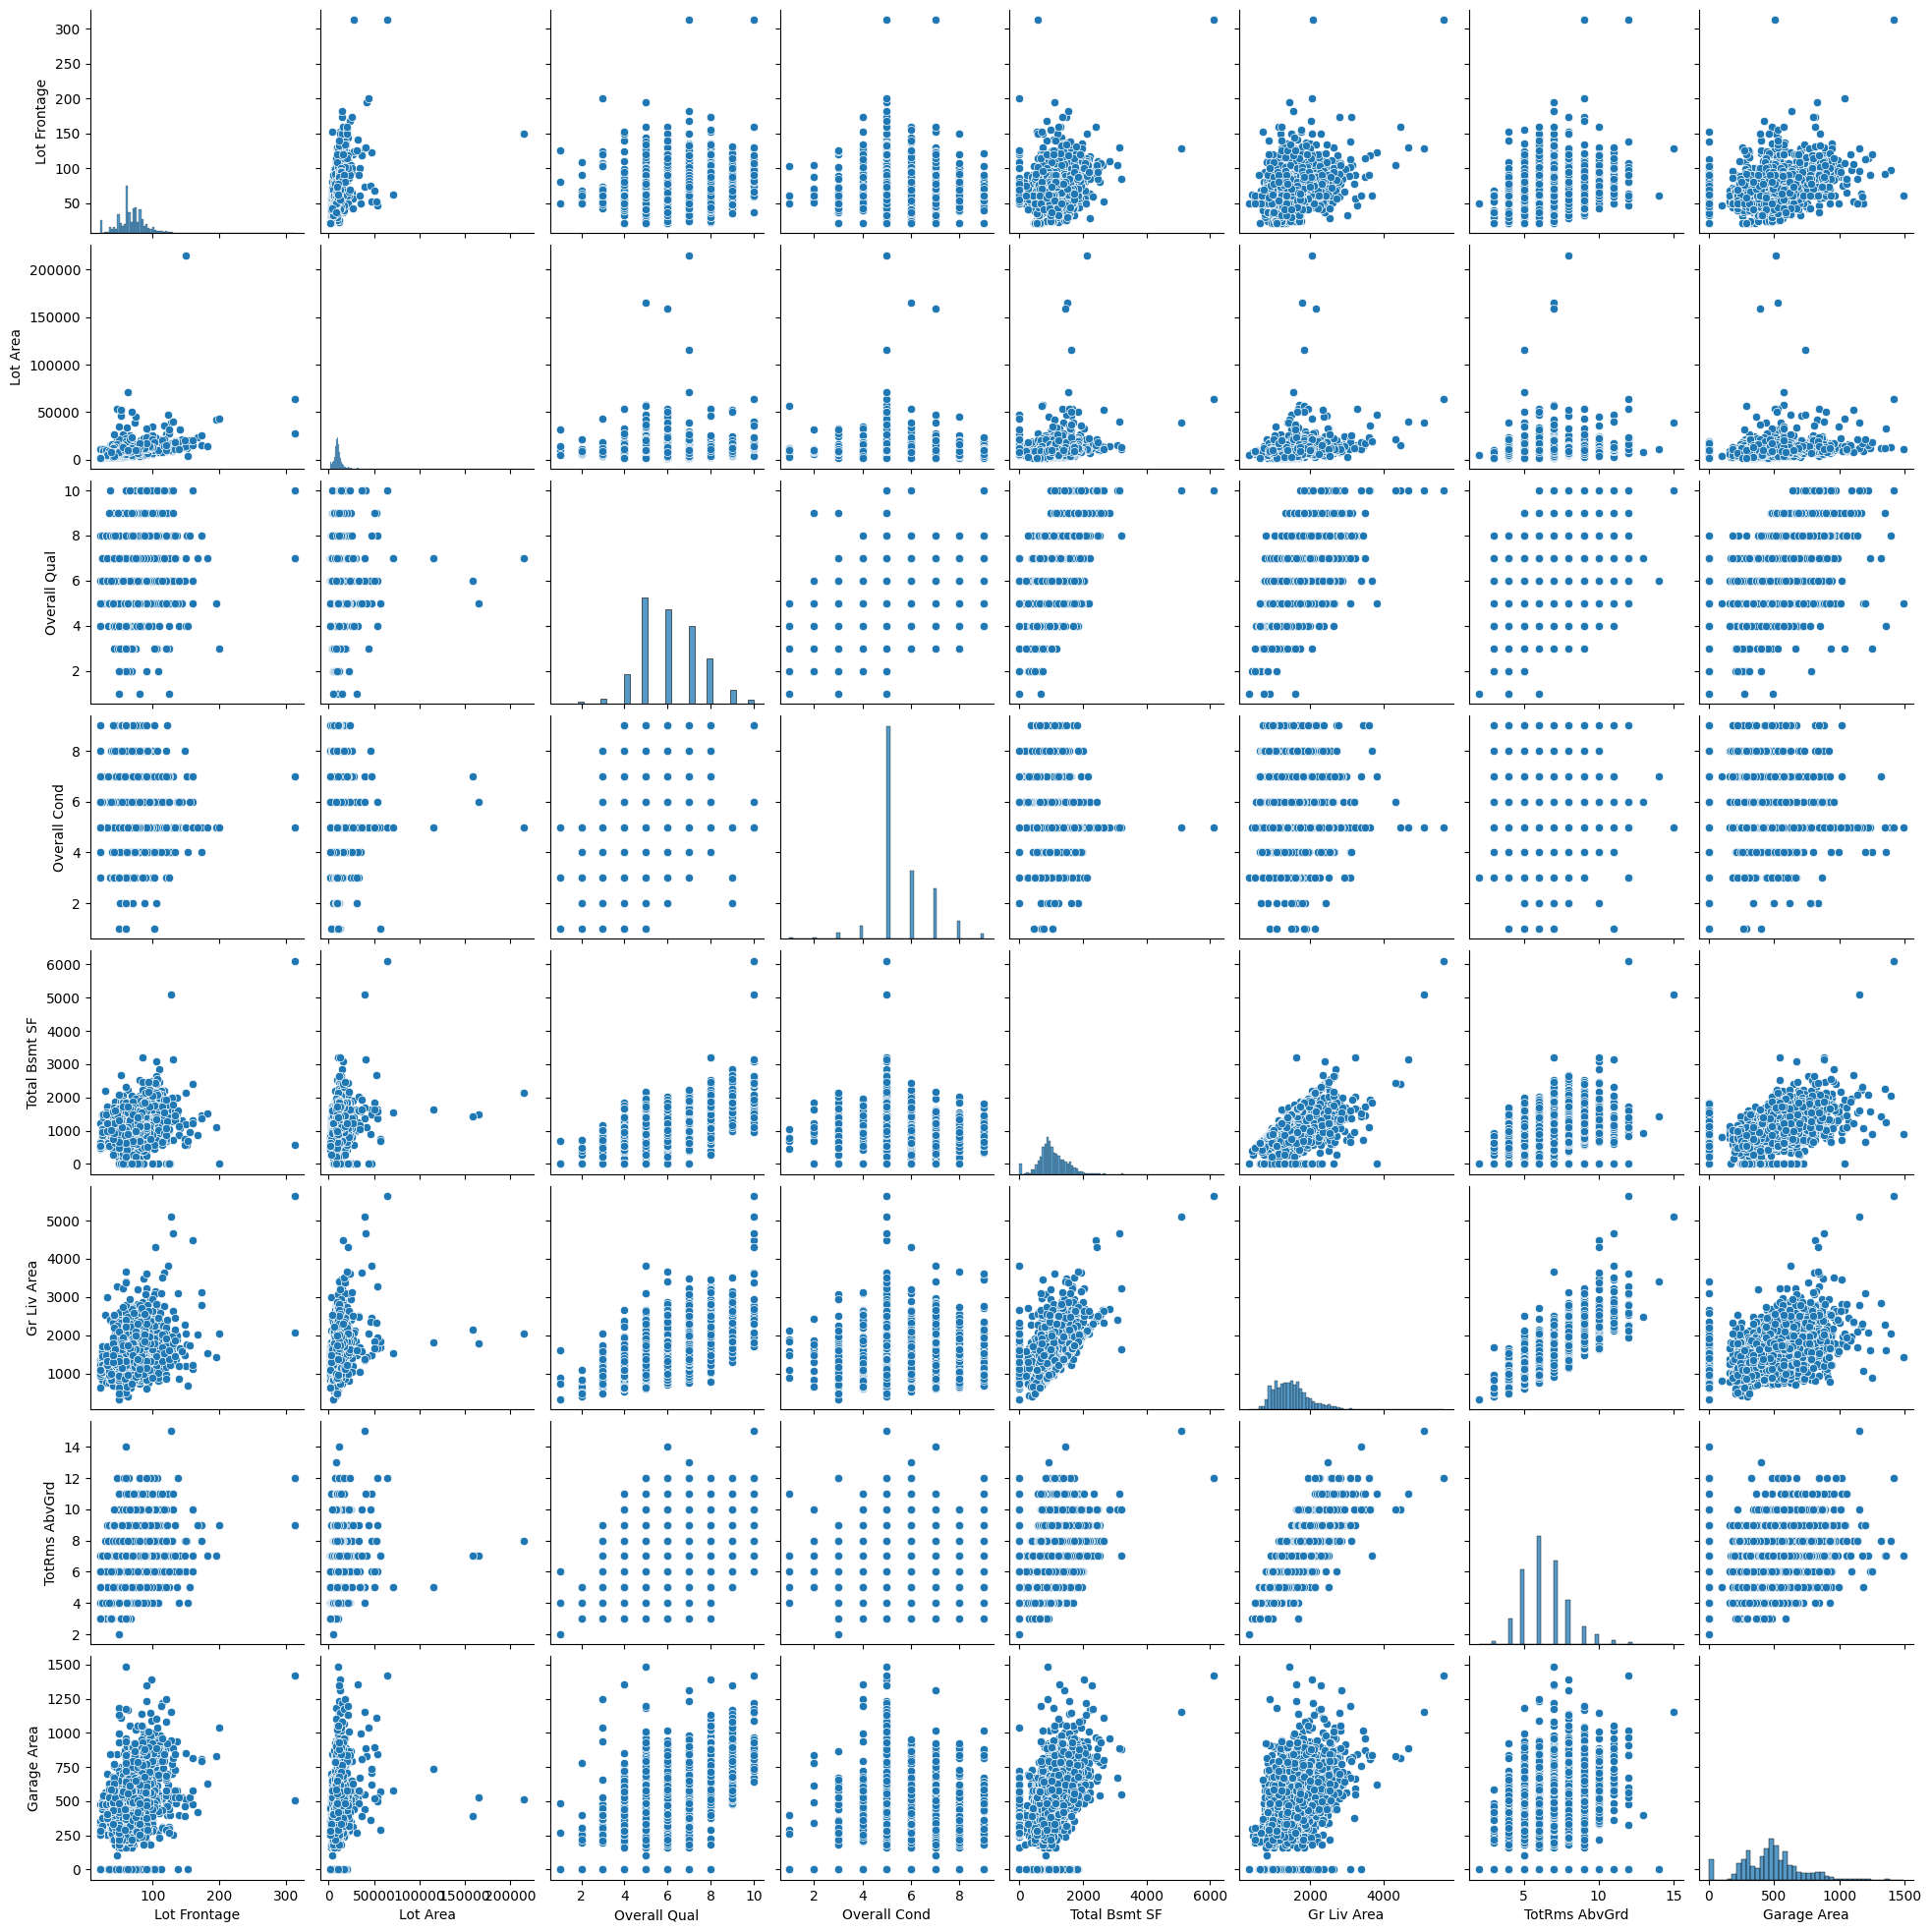

In [35]:
# Re-save the dataset dropping column 'Pool Area'
ames_full_clean = ames_full_clean.drop(columns=['Pool Area'])

# Plot the distribution of the data again
sns.pairplot(data = ames_full_clean.drop('SalePrice', axis=1))

This looks to have cleaned the data up sufficiently to the point we can now see that it is largely Gaussian. Therefore we can pre-process the data using Standardisation to scale the various features.<br><br>
There are four obvious outliers based on 'Lot Area' that will inevitably skew the remaining data so we should remove those first to enable us to ascertain the underlying patterns in the data. Without the outliers the data looks tightly grouped but with clear trends.

In [36]:
# Sort the DataFrame by 'Lot Area' in descending order
ames_full_clean = ames_full_clean.sort_values(by='Lot Area', ascending=False)

# Drop the top 4 rows (i.e. the 4 largest values)
ames_full_clean = ames_full_clean.iloc[4:].reset_index(drop=True)

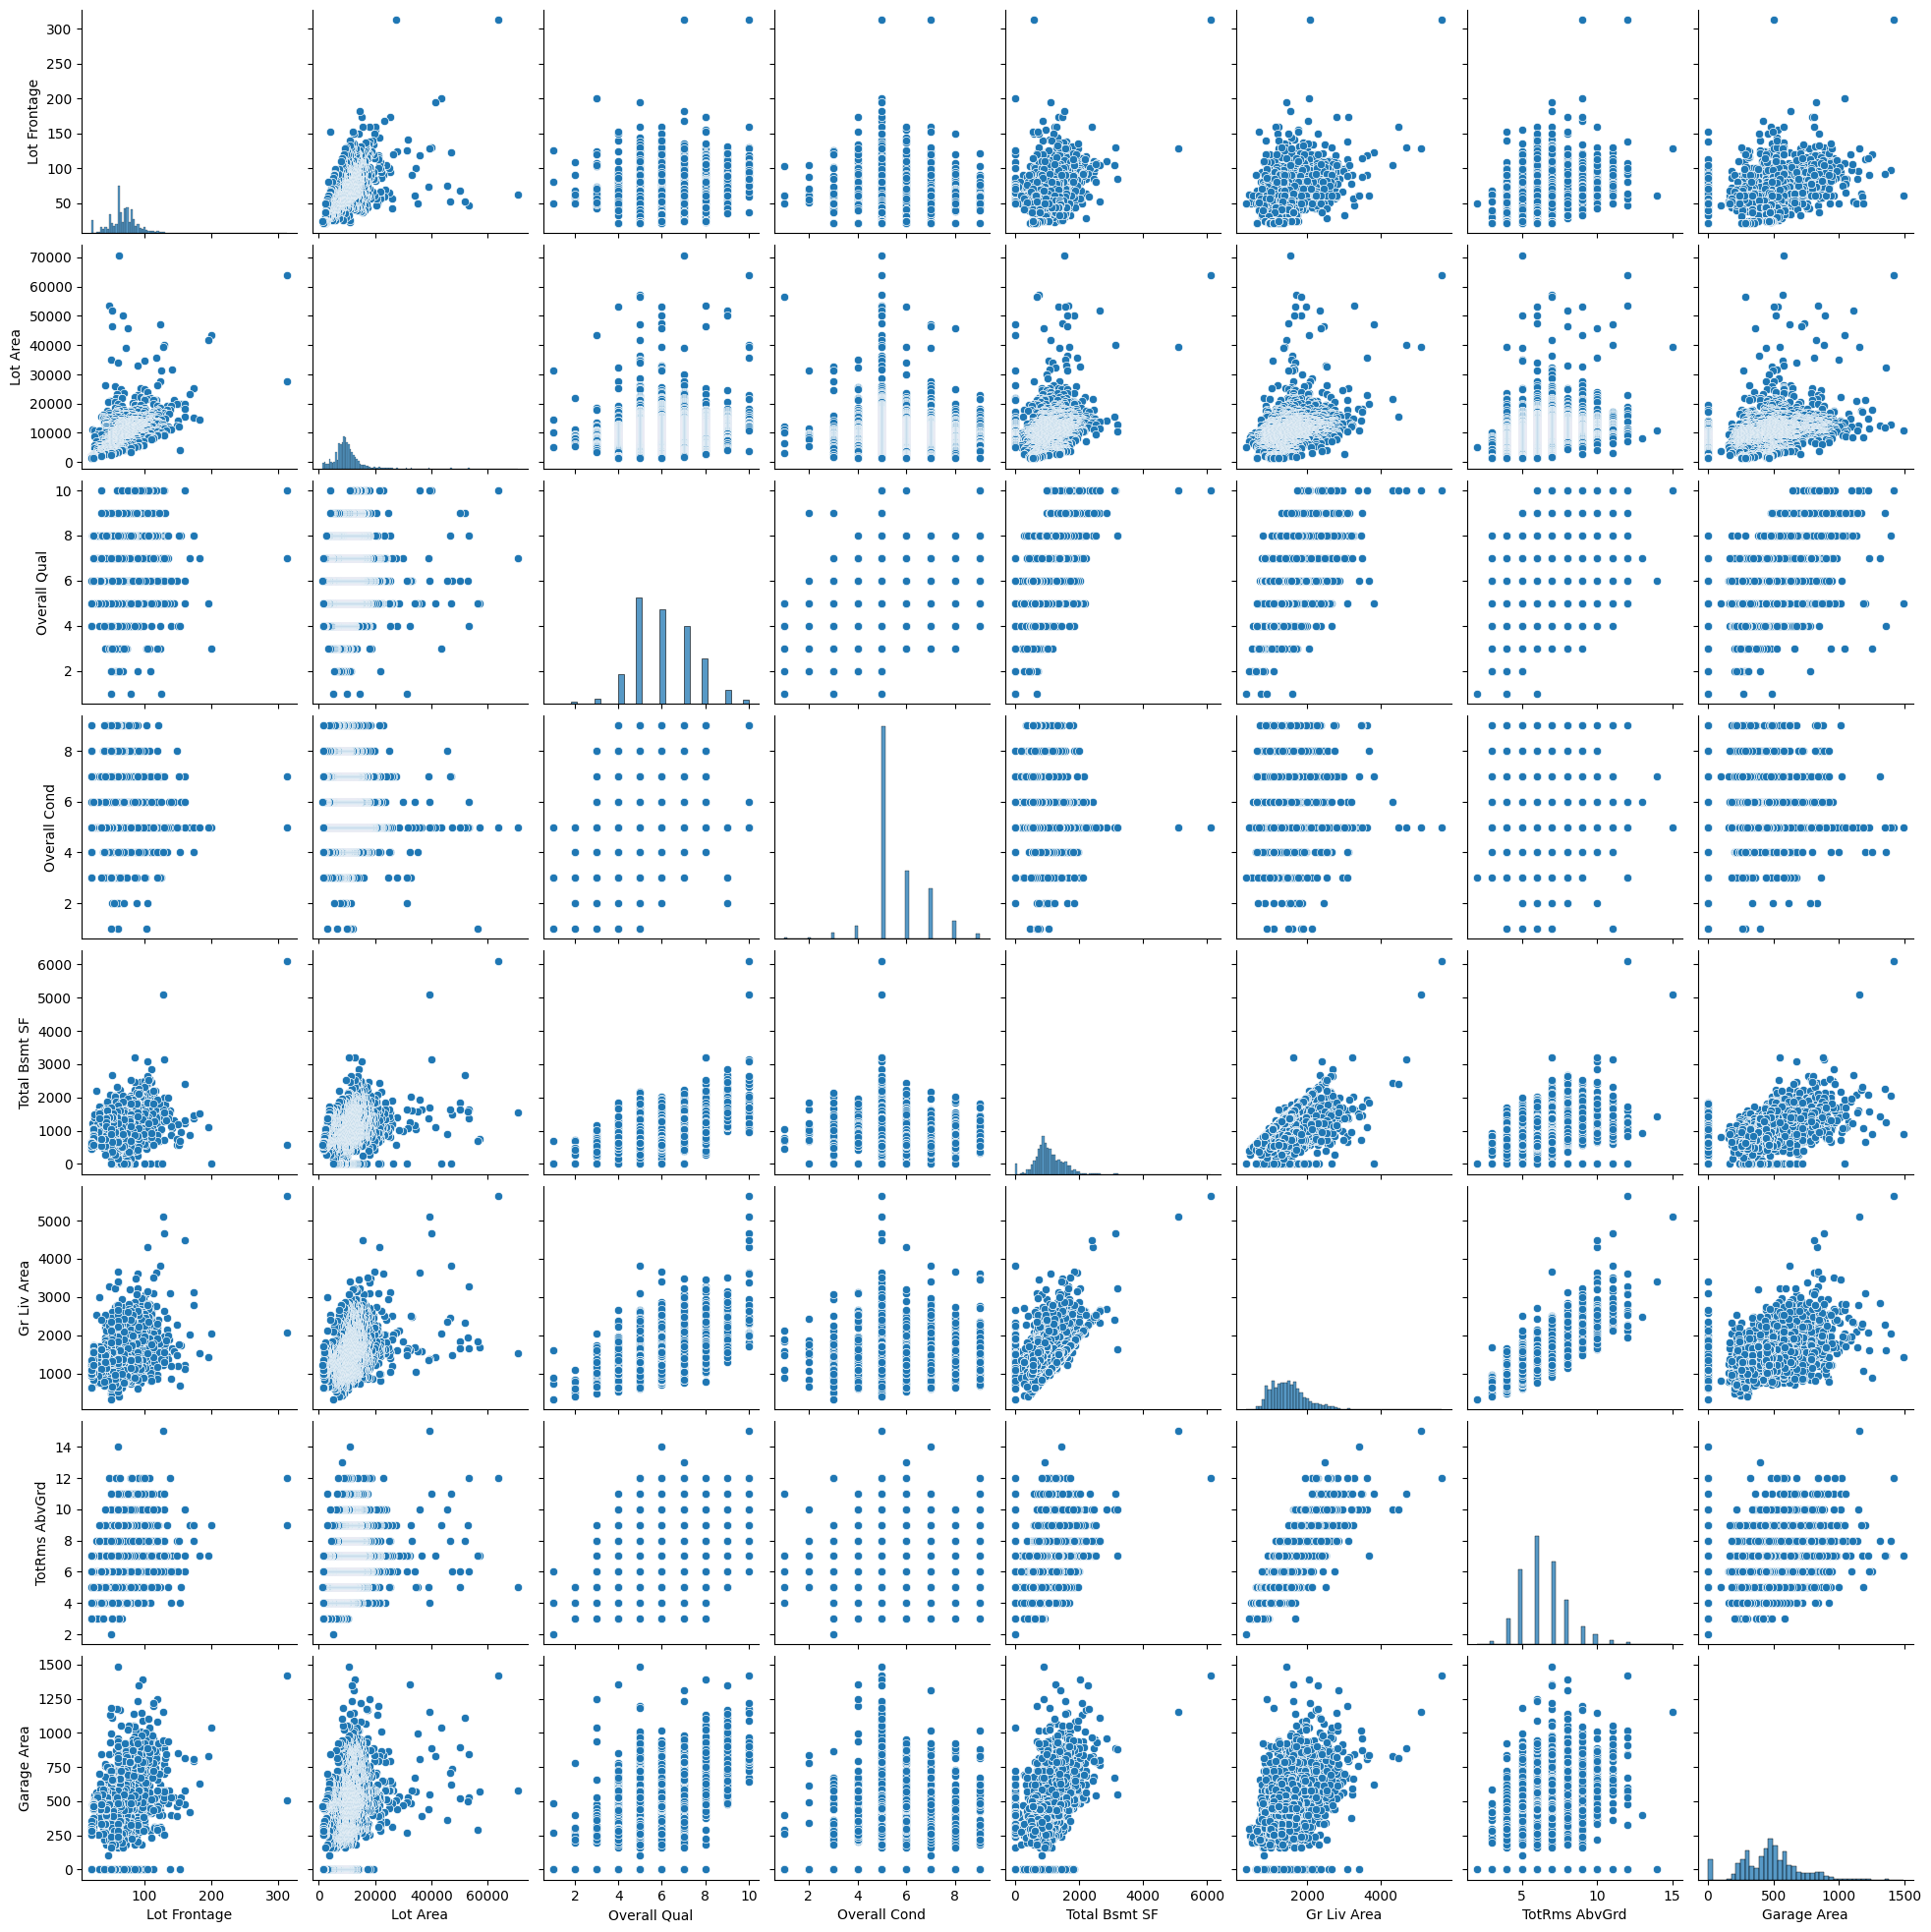

In [37]:
# Plot the distribution of the data again
sns.pairplot(data = ames_full_clean.drop('SalePrice', axis=1))

The general pattern as one might expect is fairly linear in that most pairings are directly (although not exactly) proportional - as one increases so does the other. For example looking at Lot Frontage (x-axis) vs Lot Area (y-axis) we can see that there is a general trend upwards from left to right implying that as frontage increases so does area

For our linear regression model, we will use the following independent variables:<br>
Gr Liv Area<br>
Garage Area<br><br>

We will use SalePrice as our dependent variable

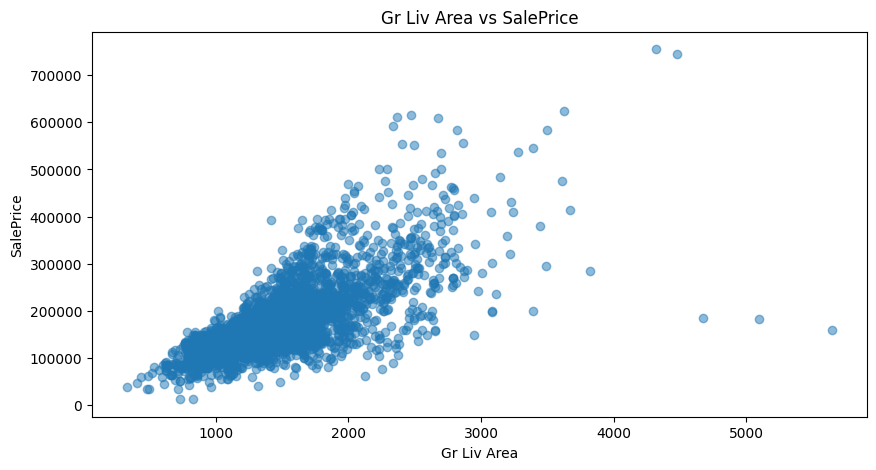

In [ ]:
# Generate simple linear plots to explore the relationship between the independent variable Gr Live Area and the dependent variable SalePrice

plt.figure(figsize=(10, 5))
x = ames_full_clean['Gr Liv Area']
y = ames_full_clean['SalePrice']
plt.scatter(x, y, alpha=0.5)
plt.title('Gr Liv Area vs SalePrice')
plt.xlabel('Gr Liv Area')
plt.ylabel('SalePrice')
plt.show()

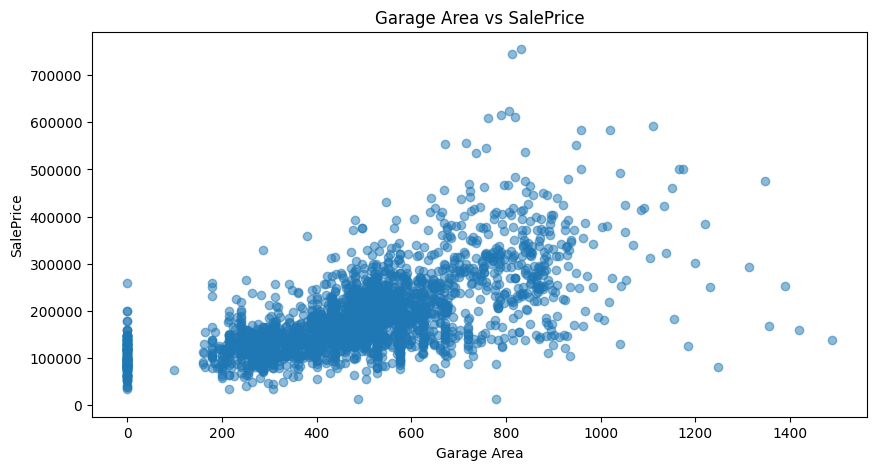

In [ ]:
# Generate simple linear plots to explore the relationship between the independent variable Garage Area and the dependent variable SalesPrice

plt.figure(figsize=(10, 5))
x = ames_full_clean['Garage Area']
y = ames_full_clean['SalePrice']
plt.scatter(x, y, alpha=0.5)
plt.title('Garage Area vs SalePrice')
plt.xlabel('Garage Area')
plt.ylabel('SalePrice')
plt.show()

Again there appears to be a directly proportional relationship to each of these independent variables and the dependent variable.

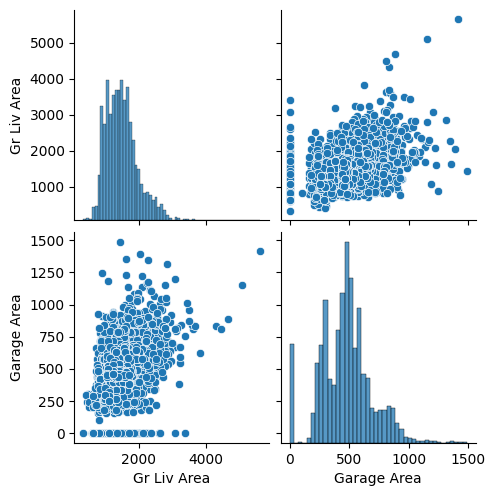

In [85]:
# Split the dataset into the independent variables and the single dependent variable
ames_full_clean = ames_full_clean.fillna(0) # Fill NaN values with 0
X = ames_full_clean.iloc[:, [5, 7]].values
y = ames_full_clean['SalePrice']

# Plot the distribution of the data again
sns.pairplot(data = ames_full_clean[['Gr Liv Area', 'Garage Area']])

The independent variables appear to be Normally distributed so we will apply Standardisation initially and assess the results then if the tail in the Garage Area feature (properties that have no garage) has an effect we will try Normalisation

In [93]:
# Build a multiple linear regression model using a training set with all the independent variables
# Split data into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25,  random_state=23, shuffle=True)

print ("Training data:",X_train.shape, y_train.shape)
print ("Test data:",X_test.shape, y_test.shape)

Training data: (2194, 2) (2194,)
Test data: (732, 2) (732,)


In [ ]:
# Fit a model
lm = LinearRegression()
model = lm.fit(X_train, y_train)

# Create line coordinates
X_line = np.empty(X_test.shape)
for i in range(X_test.shape[1]):
    X_line[:, i] = np.linspace(np.min(X_test[:,i]), np.max(X_test[:,i]), num=X_test.shape[0])
y_line = lm.predict(X_line)

print('Intercept: \n', lm.intercept_)
print('Coefficients: \n', lm.coef_)


Intercept: 
 -7497.79073922016
Coefficients: 
 [ 79.99662535 143.55333325]


We can largely ignore the Intercept in this context as no property has no garage and no living space but it's necessary for the regression model

In [95]:
# Generate predictions on the test sets

predictions = lm.predict(X_test)
ten_sorted_predictions = np.sort(predictions[0:10]) # Sort the first 10 predictions in ascending order
rounded_sorted_predictions = np.round(ten_sorted_predictions, 2) # Round the sorted predictions to 2 decimal places as it is a currency value
# Print the sorted predictions

print("Initial 10 predictions in ascending order:")
for pred in rounded_sorted_predictions:
    print(pred)

Initial 10 predictions in ascending order:
83956.34
105617.44
149426.13
151644.0
164977.69
198495.26
211706.57
212119.25
212820.41
352042.35


In [96]:
# Compute R-squared for your model on the test set

print ("R2 Score for standardised data:", round (model.score(X_test, y_test), 4))

# Compute RMSE for your model on the test set
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print("RMSE for standardised data:", round(rmse, 2))

R2 Score for standardised data: 0.6241
RMSE for standardised data: 49871.64


The R-square score suggests the model performs better than average but still not brilliantly.<br><br>
The root mean square seems large but we need to understand how it relates to the full Sales Price data set before we can form a conclusion

In [97]:
print("Min sale price:", round(y_test.min(), 2))
print("Max sale price:", round(y_test.max(), 2))
print("Average sale price:", round(y_test.mean(), 2))

Min sale price: 12789
Max sale price: 582933
Average sale price: 184581.32


Given that the RMSE is just over 25% of the average house price this seems too large an error for the model to be accurate.<br><br>
Plotting the errors should make it easier to visualise the differences

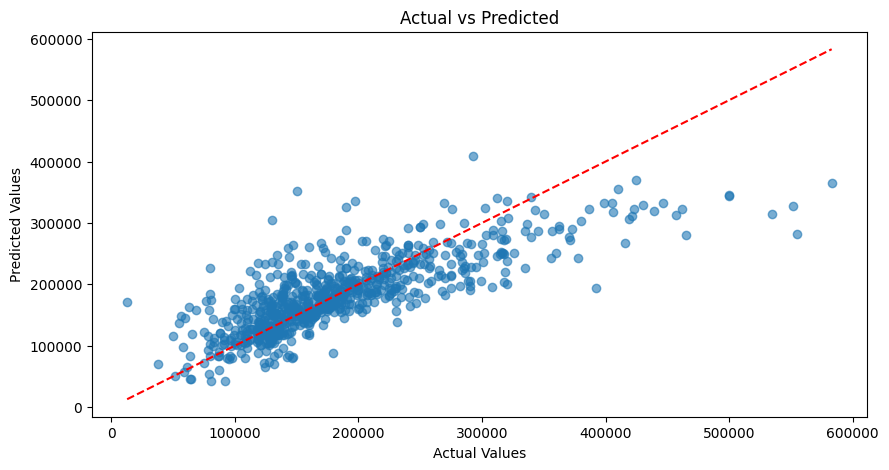

In [98]:
# Plot the predicted vs actual values

plt.figure(figsize=(10, 5))
plt.scatter(y_test, predictions, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # ideal line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted")
plt.show()

We can see that the values cluster quite densely around the diagonal y=x lineup to a certain Actual Value (around 250,000) and then after that appear almost exclusively below that line. This suggests that the model is quit effective at prdicting sale price inlower value properties but tends to under value on the higher end of the market.<br><br>

The issue with this model is likely that we are only using two independent variables to try and predict sales price and those variables aren't even necessarily the most relevant.

In [ ]:
# Calculate median predicted sale price
median_prediction = np.median(predictions)

# Print the median prediction
print(f"Median Predicted Sale Price: ${median_prediction:,.2f}")

Median Predicted Sale Price: $175,454.48


The coefficients have previously been calculated as:<br>

Gross Living Area: 79.9966<br>
Garage Area: 143.5533<br><br>

This implies that for every added square foot of each the Garage Area has almost twice the affect on Sales Price. This seems counterintuitive until one realises that Ames is situated in an area of high tornado risk so perhaps having a large garage is of high importance as it means people are not forced to store vehicles and other items outside where they are at risk of damage or total destruction.<br>

The main issue with the model we have been instructed to build is that it only uses two independent variables out of approximately 80. Whlist not all of those variables will be relevant trying to build a useful predictive model using only two cannot possibly give the best results.